In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import ImageTk, ImageDraw, Image
from tkinter import *

import os
import cv2
from keras.models import load_model



In [2]:

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

model =load_model(r'model_hand.h5')

print('@@ Model loaded')


@@ Model loaded


In [3]:

#User Interface for Drawing character....

def create_new_image():
    width = 256
    height = 256
    center = height // 2
    white = (255, 255, 255)
    green = (0, 128, 0)
    
    def save():
        filename = 'handwriten.jpg'
        image.save(filename)
        
    def paint(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        cv.create_oval(x1, y1, x2, y2, fill = 'black', width = 20)
        draw.line([x1, y1, x2, y2], fill = 'black', width = 20)
        
    root = Tk()
    
    cv = Canvas(root, width = width, height = height, bg = 'white')
    cv.pack()
    
    image = PIL.Image.new('RGB', (width, height), white)
    draw = ImageDraw.Draw(image)
    
    cv.pack(expand = YES, fill = BOTH)
    cv.bind("<B1-Motion>", paint)
    
    button = Button(text = 'Save', command = save)
    button.pack()
    
    root.mainloop()
    
  

In [4]:
#fuction calling....  
    
create_new_image()   

In [5]:
#Image Processing.....
   
img = cv2.imread(r'handwriten.jpg')
img_copy = img.copy()

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))


In [7]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_,img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)


In [8]:

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [9]:
img_pred = word_dict[np.argmax(model.predict(img_final))]

1/1 [==============================] - 0s 128ms/step


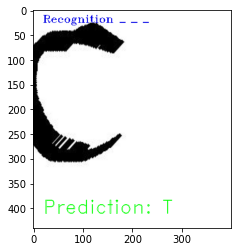

In [10]:

cv2.putText(img, "Recognition _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,255,0))
cv2.imshow('The pridicted character is', img)

plt.imshow(img)
 

In [11]:
# Deleting the created image....
def delete_created_image():
     os.remove('')
     


In [ ]:
     

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 0:
        break
cv2.destroyAllWindows() 